## Previsão da Qualidade do Leite

### Importando Pacotes

#### Dataset encontrado no Kaggle
#### Disponível em: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

### Carregando Dataset


In [ ]:
# Carregando dataset em um dataframe do pandas
data = pd.read_csv(r"C:\Users\Camil\Downloads\archive\milknew.csv")

In [ ]:
# Verificando as cinco primeiras linhas com head()
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
# Verificando últimas cinco linhas com tail()
data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [ ]:
# Verificando formato dos dados
data.shape

(1059, 8)

In [ ]:
# Informações do Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
# Informações matemáticas do Dataset

#count - comtagem
#mean - média
#std - desvio padrão
#min - menor valor
#max - maior valor
#% - percentil
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
# Verificando a correlação do Dataset

#1 = correlação forte
#-1 = correlação fraca
data.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


In [ ]:
# Verificando valores nulos/perdidos
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [ ]:
data.loc[data["Grade"] == 'high', "Grade"] = 2
data.loc[data["Grade"] == 'medium', "Grade"] = 1
data.loc[data["Grade"] == 'low', "Grade"] = 0
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
# Convertendo "Grade" para um inteiro, pois está aparecendo como um objeto
data["Grade"] = data["Grade"].astype(str).astype(int)

In [ ]:
# Verificando a conversão 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 62.2 KB


In [ ]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


## Análise de Correlação Gráfica


<Axes: xlabel='pH', ylabel='Count'>

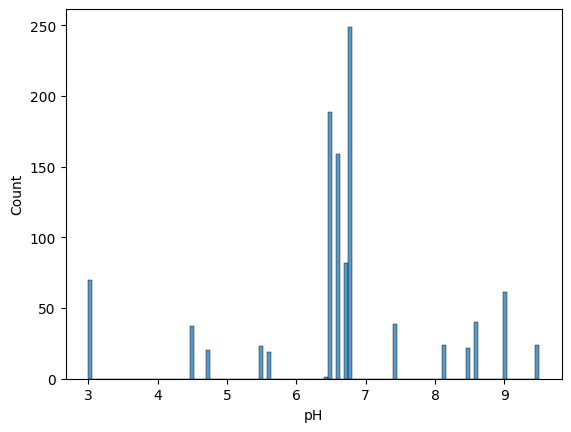

In [ ]:
sns.histplot(data['pH'])

<Axes: xlabel='pH', ylabel='Density'>

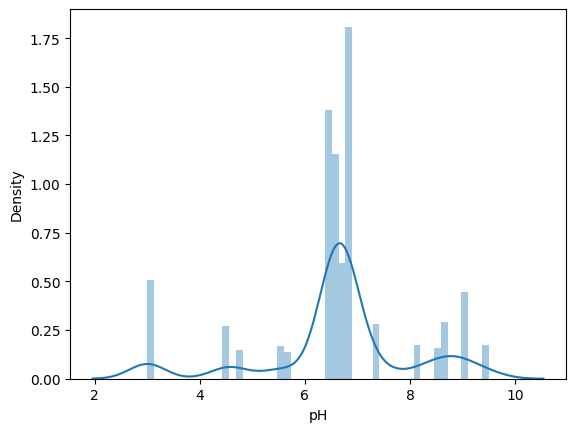

In [ ]:
sns.distplot(data['pH'])

<Axes: xlabel='pH'>

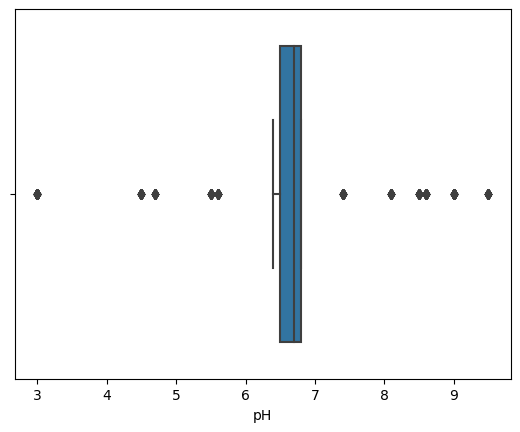

In [ ]:
sns.boxplot(data['pH'])

<Axes: xlabel='Temprature', ylabel='Count'>

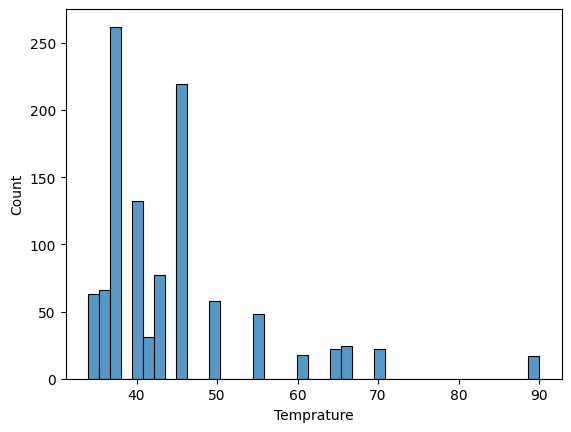

In [ ]:
sns.histplot(data['Temprature'])

<Axes: xlabel='Temprature', ylabel='Density'>

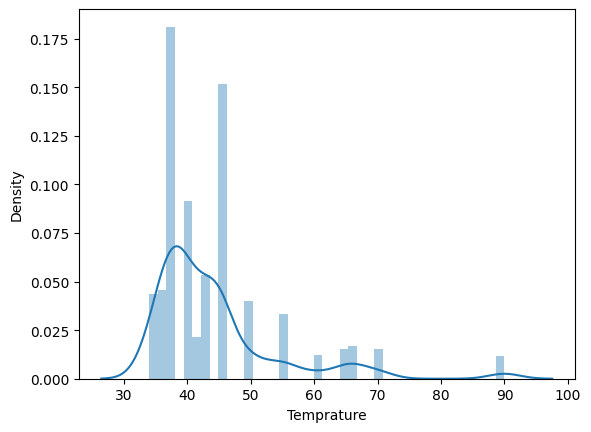

In [ ]:
sns.distplot(data['Temprature'])

<Axes: xlabel='Temprature'>

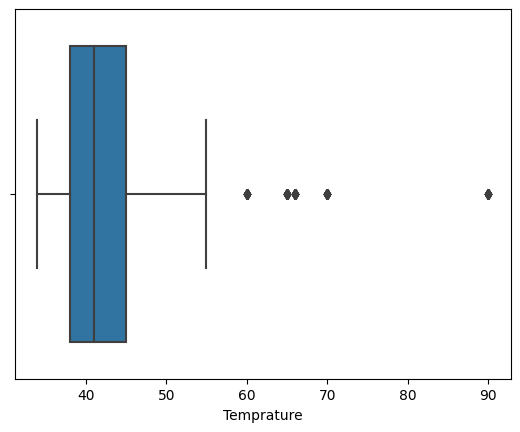

In [ ]:
sns.boxplot(data['Temprature'])

<Axes: xlabel='Taste', ylabel='Count'>

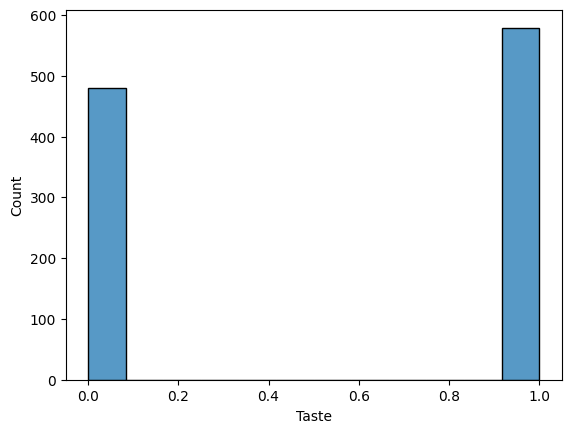

In [ ]:
sns.histplot(data['Taste'])

<Axes: xlabel='Taste', ylabel='Density'>

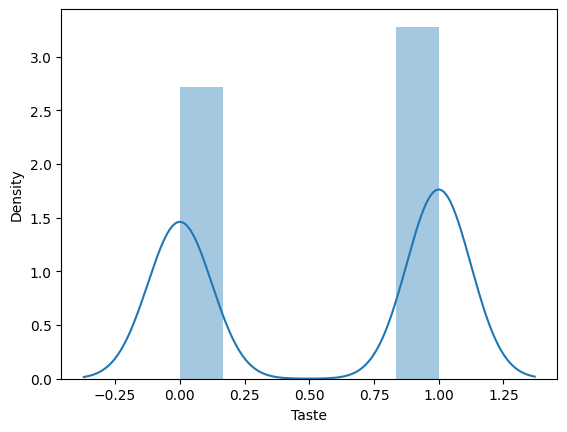

In [ ]:
sns.distplot(data['Taste'])

<Axes: xlabel='Taste'>

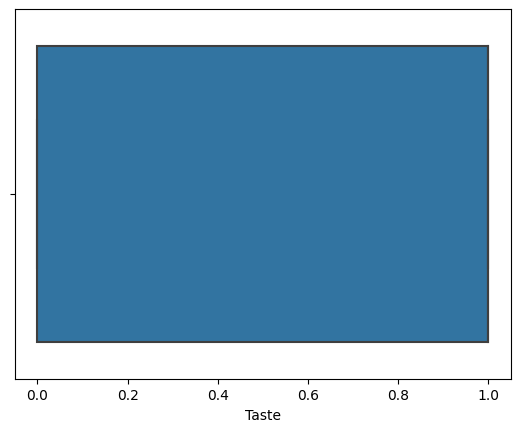

In [ ]:
sns.boxplot(data['Taste'])

<Axes: xlabel='Odor', ylabel='Count'>

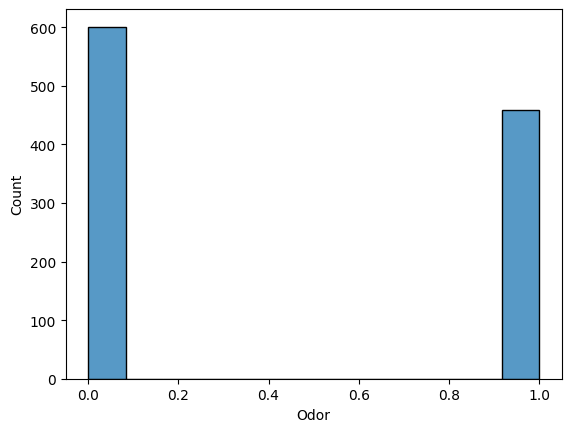

In [ ]:
sns.histplot(data['Odor'])

<Axes: xlabel='Odor', ylabel='Density'>

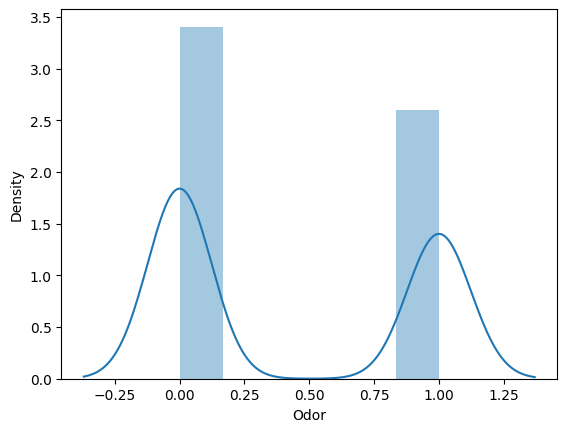

In [ ]:
sns.distplot(data['Odor'])

<Axes: xlabel='Odor'>

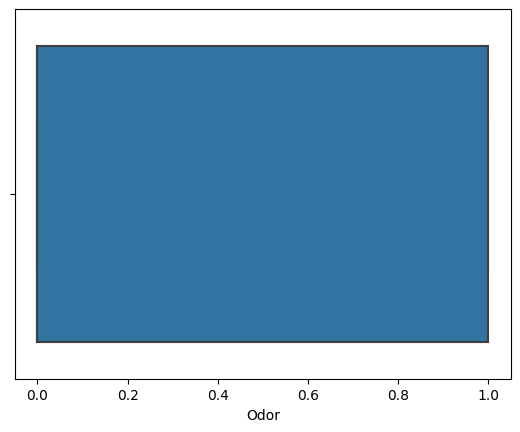

In [ ]:
sns.boxplot(data['Odor'])

<Axes: xlabel='Turbidity', ylabel='Count'>

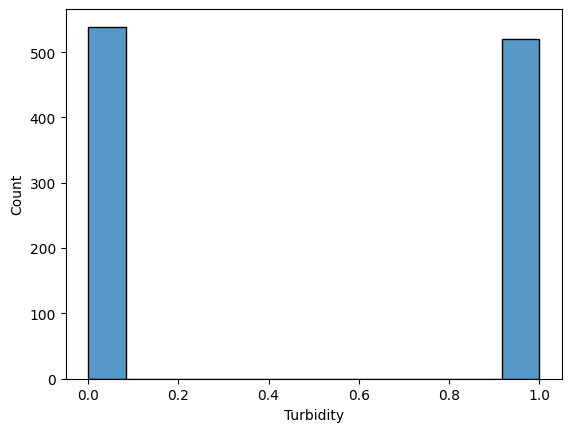

In [ ]:
sns.histplot(data['Turbidity'])

<Axes: xlabel='Turbidity', ylabel='Density'>

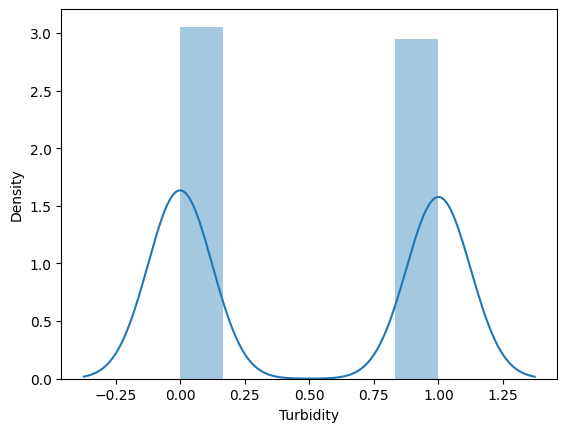

In [ ]:
sns.distplot(data['Turbidity'])

<Axes: xlabel='Turbidity'>

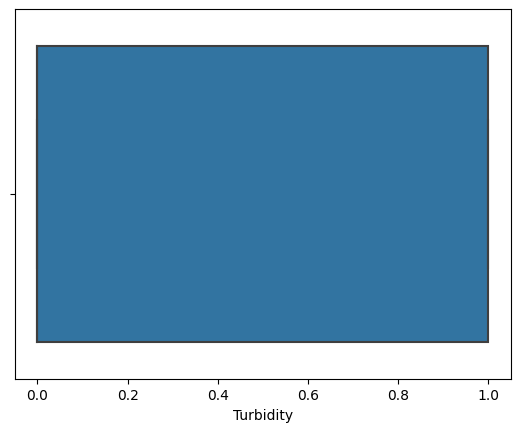

In [ ]:
sns.boxplot(data['Turbidity'])

<Axes: xlabel='Colour', ylabel='Count'>

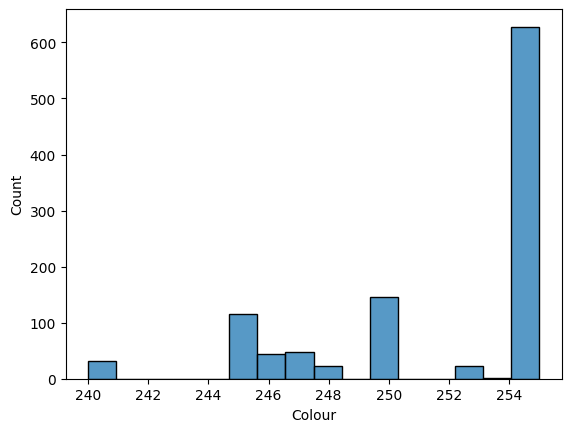

In [ ]:
sns.histplot(data['Colour'])

<Axes: xlabel='Colour', ylabel='Density'>

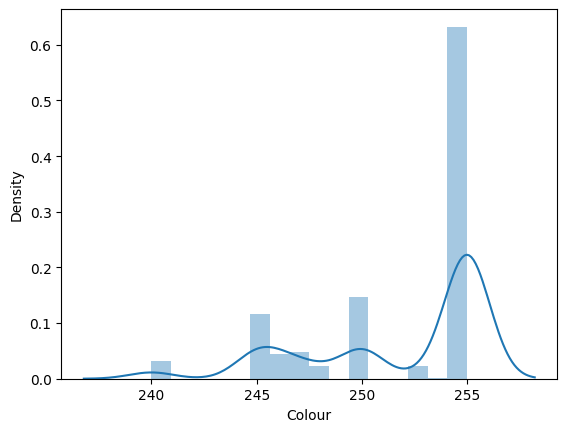

In [ ]:
sns.distplot(data['Colour'])

<Axes: xlabel='Colour'>

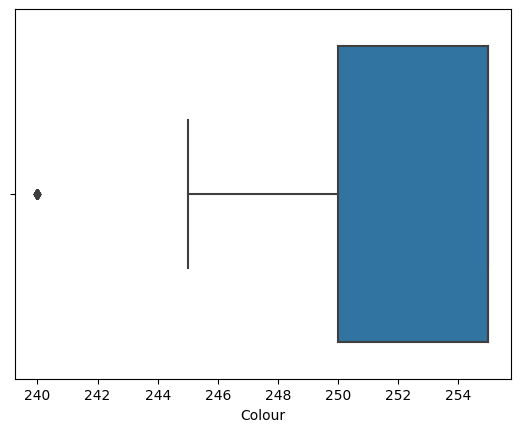

In [ ]:
sns.boxplot(data['Colour'])

<Axes: xlabel='Grade', ylabel='Count'>

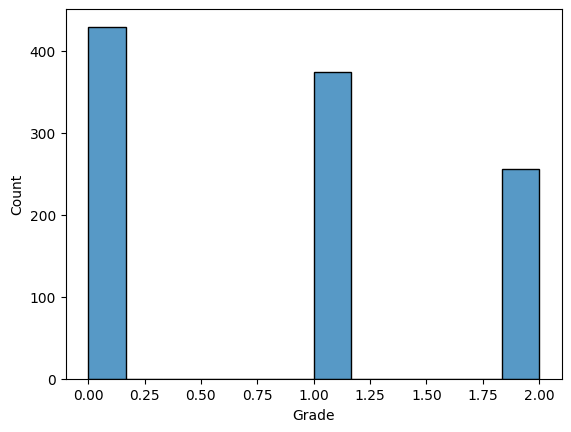

In [ ]:
sns.histplot(data['Grade'])

<Axes: xlabel='Grade', ylabel='Density'>

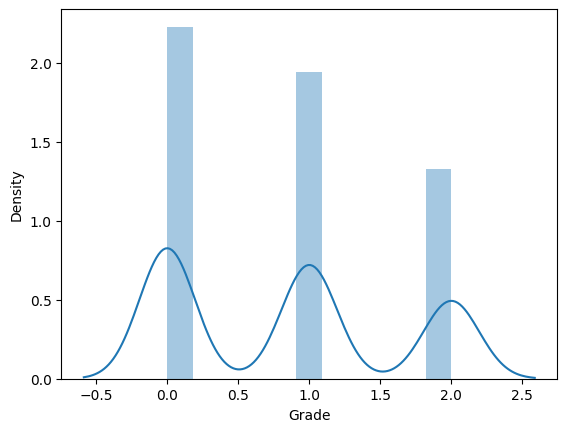

In [ ]:
sns.distplot(data['Grade'])

<Axes: xlabel='Grade'>

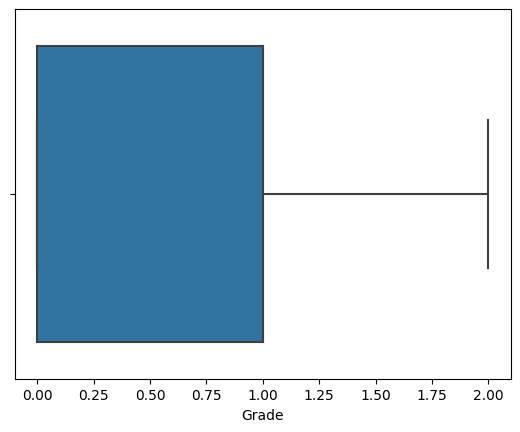

In [ ]:
sns.boxplot(data['Grade'])

<Axes: >

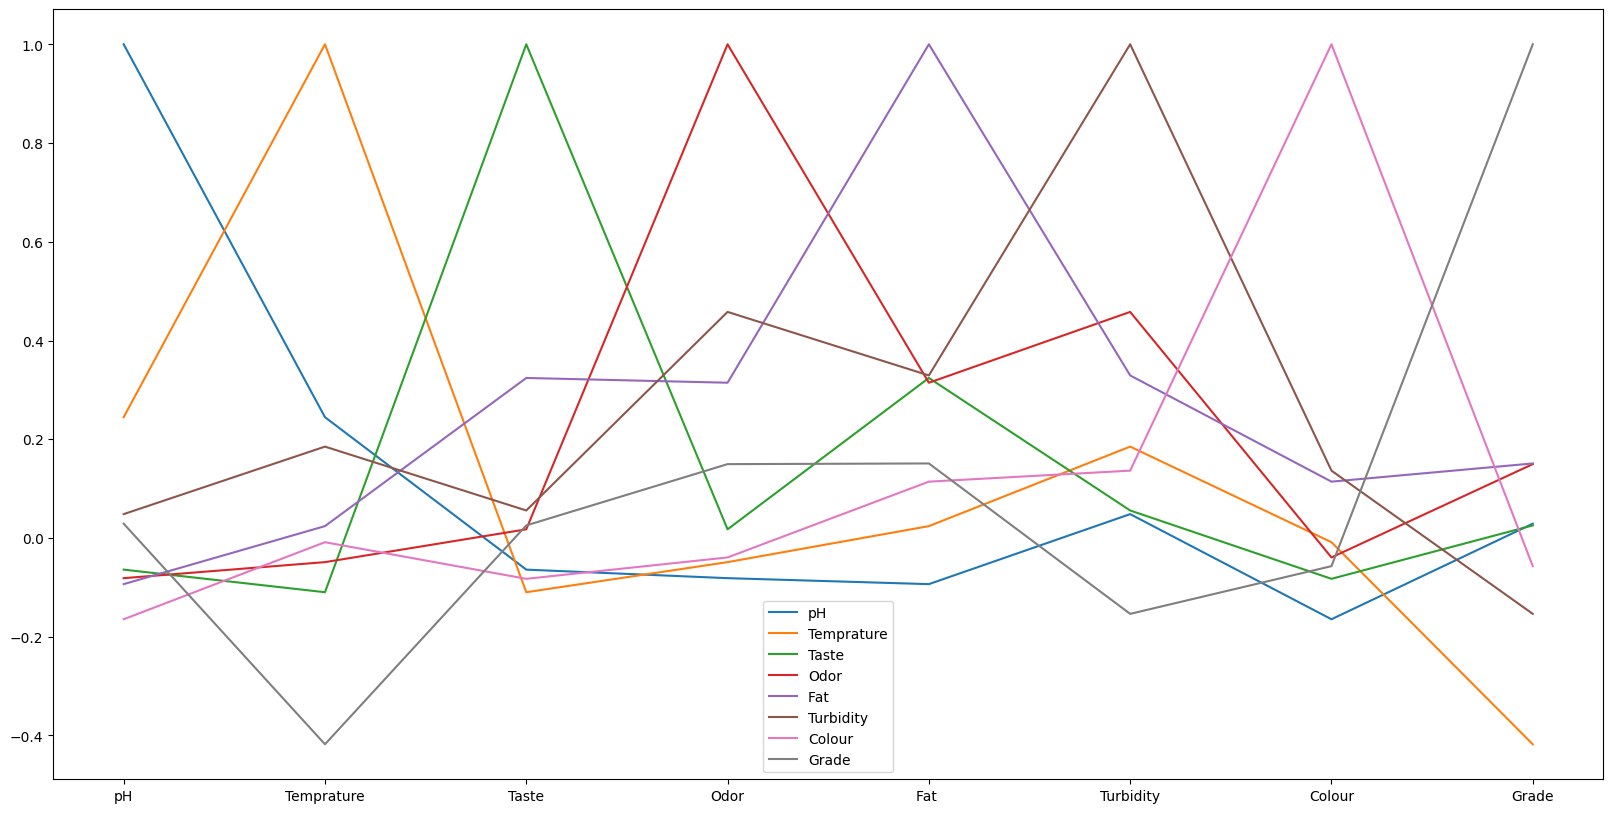

In [ ]:
# Gráfico de correlação
data_corr = data.corr()
data_corr.plot(figsize=(20,10))

<Axes: >

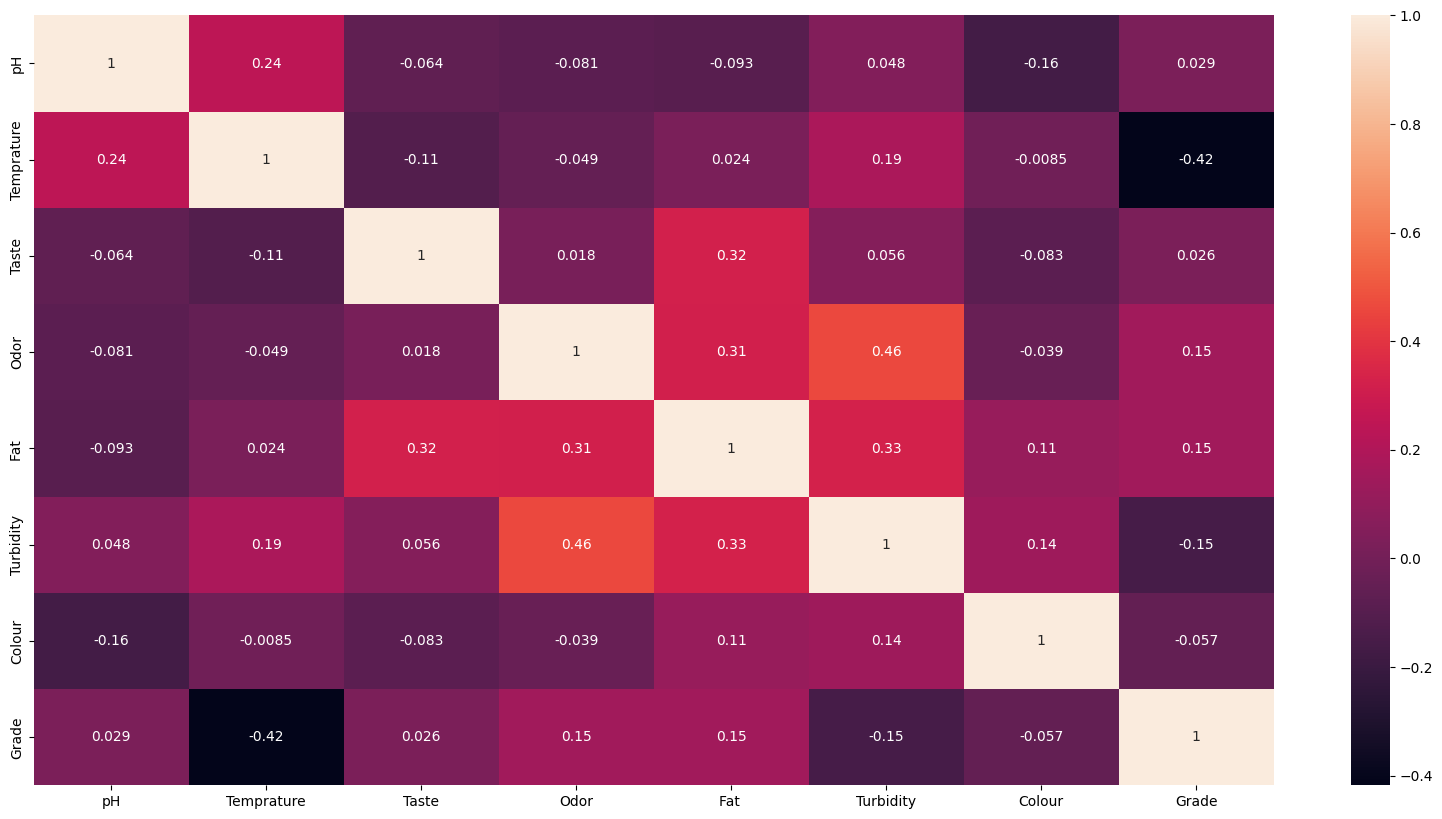

In [ ]:
# Gráfico de heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

## Análise de Valores com Gráficos
### Criando gráficos para analisar como as variáveis se relacionam com "Grade" de forma dinâmica

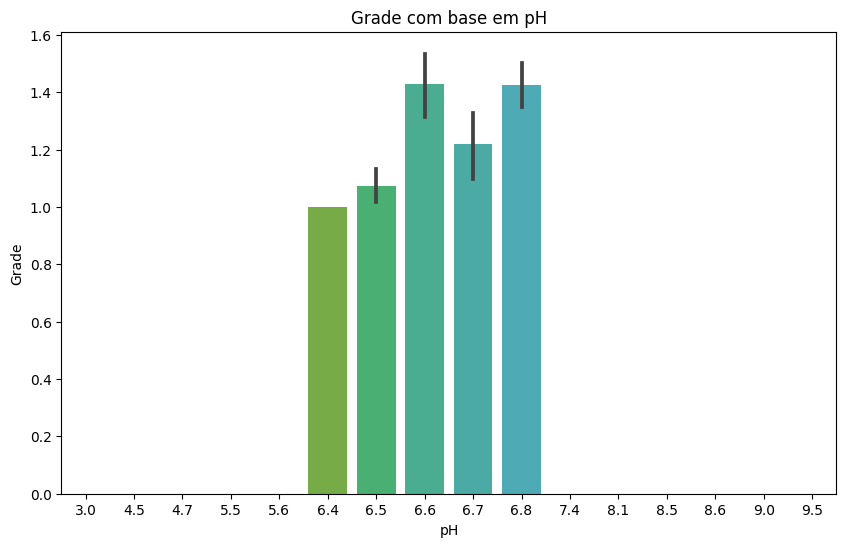

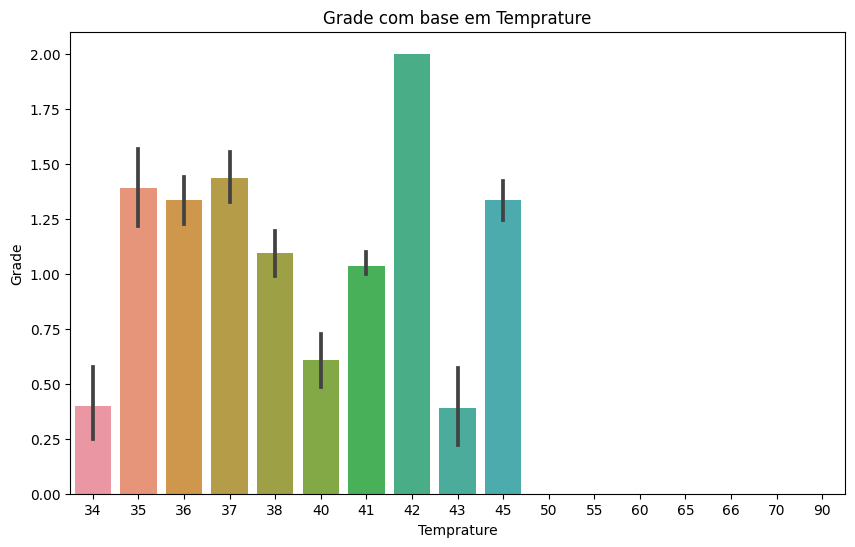

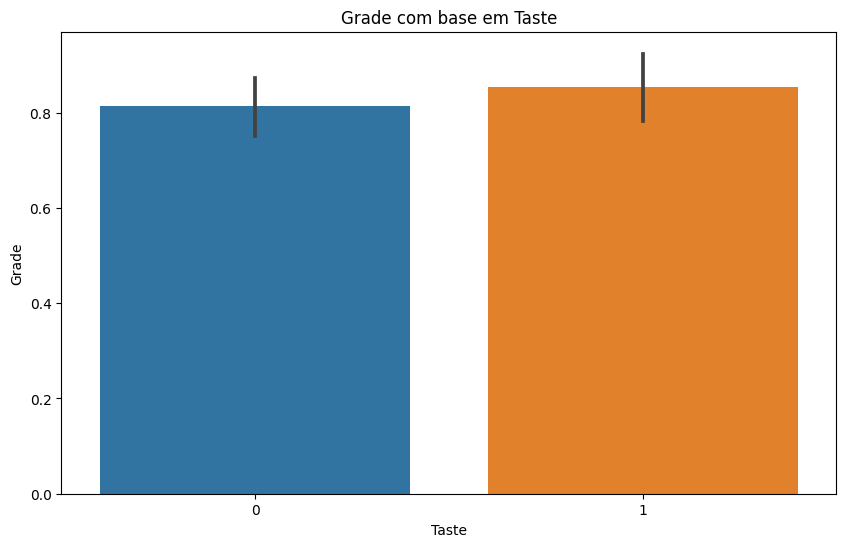

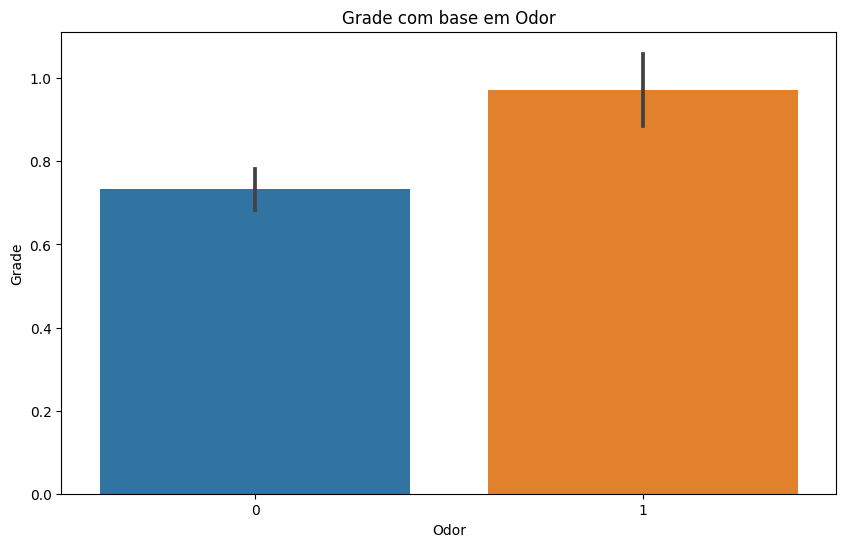

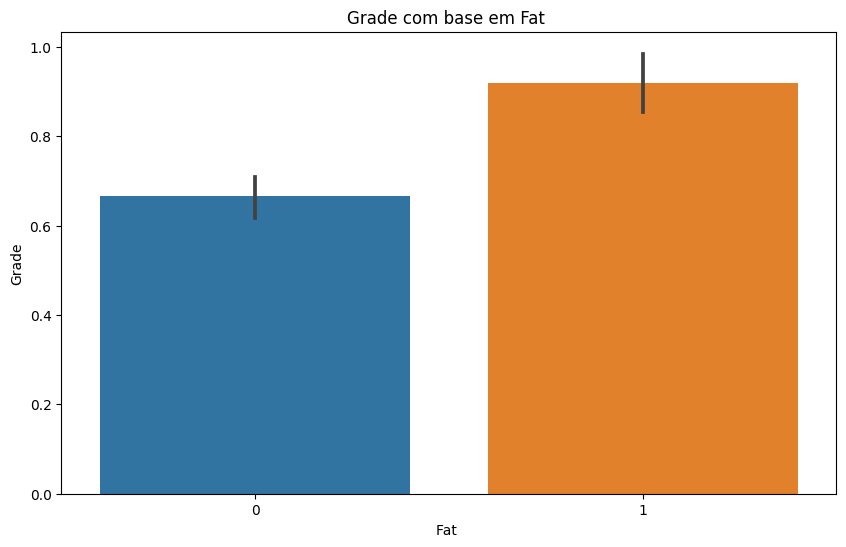

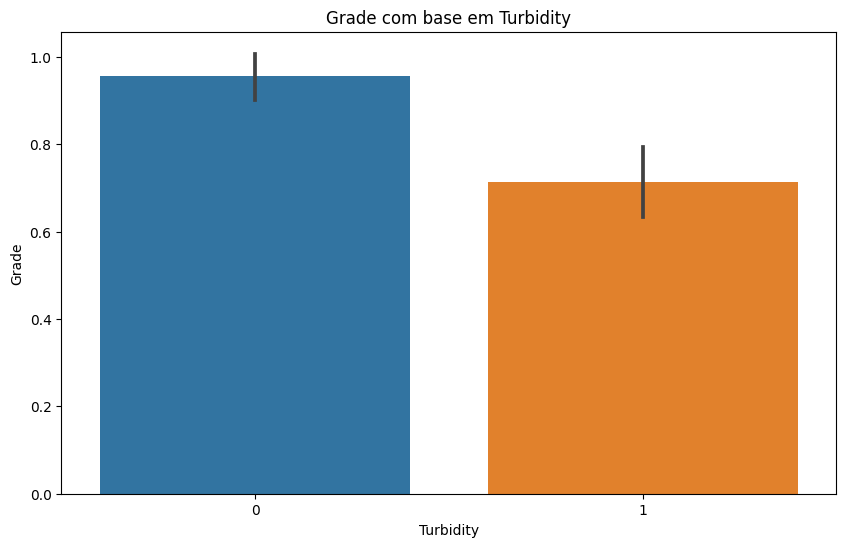

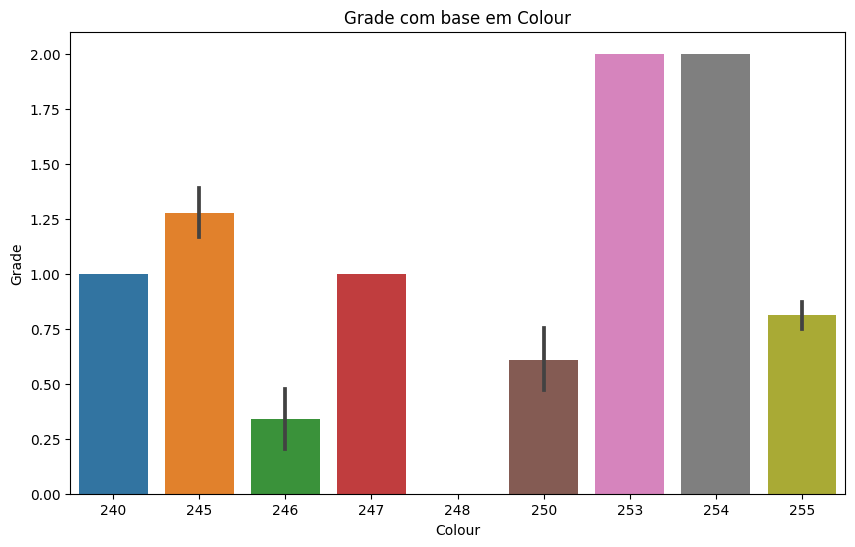

In [ ]:
for coluna in data:
    if coluna != "Grade":
        fig, ax = plt.subplots(figsize=(10,6))    
        sns.barplot(data=data, x=coluna, y="Grade", ax=ax)
        plt.title('Grade com base em ' + coluna)

<Axes: ylabel='Taste'>

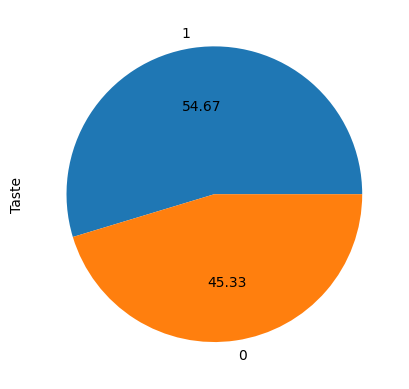

In [ ]:
data['Taste'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Odor'>

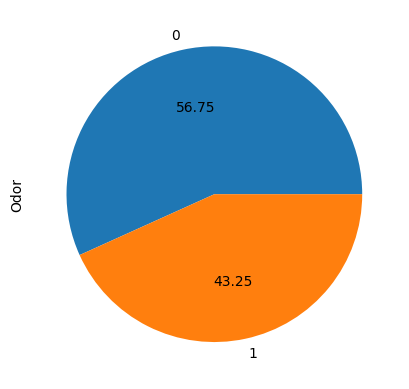

In [ ]:
data['Odor'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Grade'>

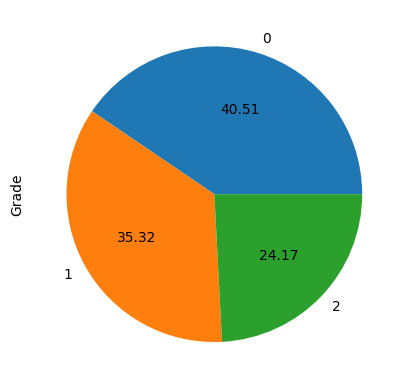

In [ ]:
data['Grade'].value_counts().plot(kind='pie',autopct='%.2f')

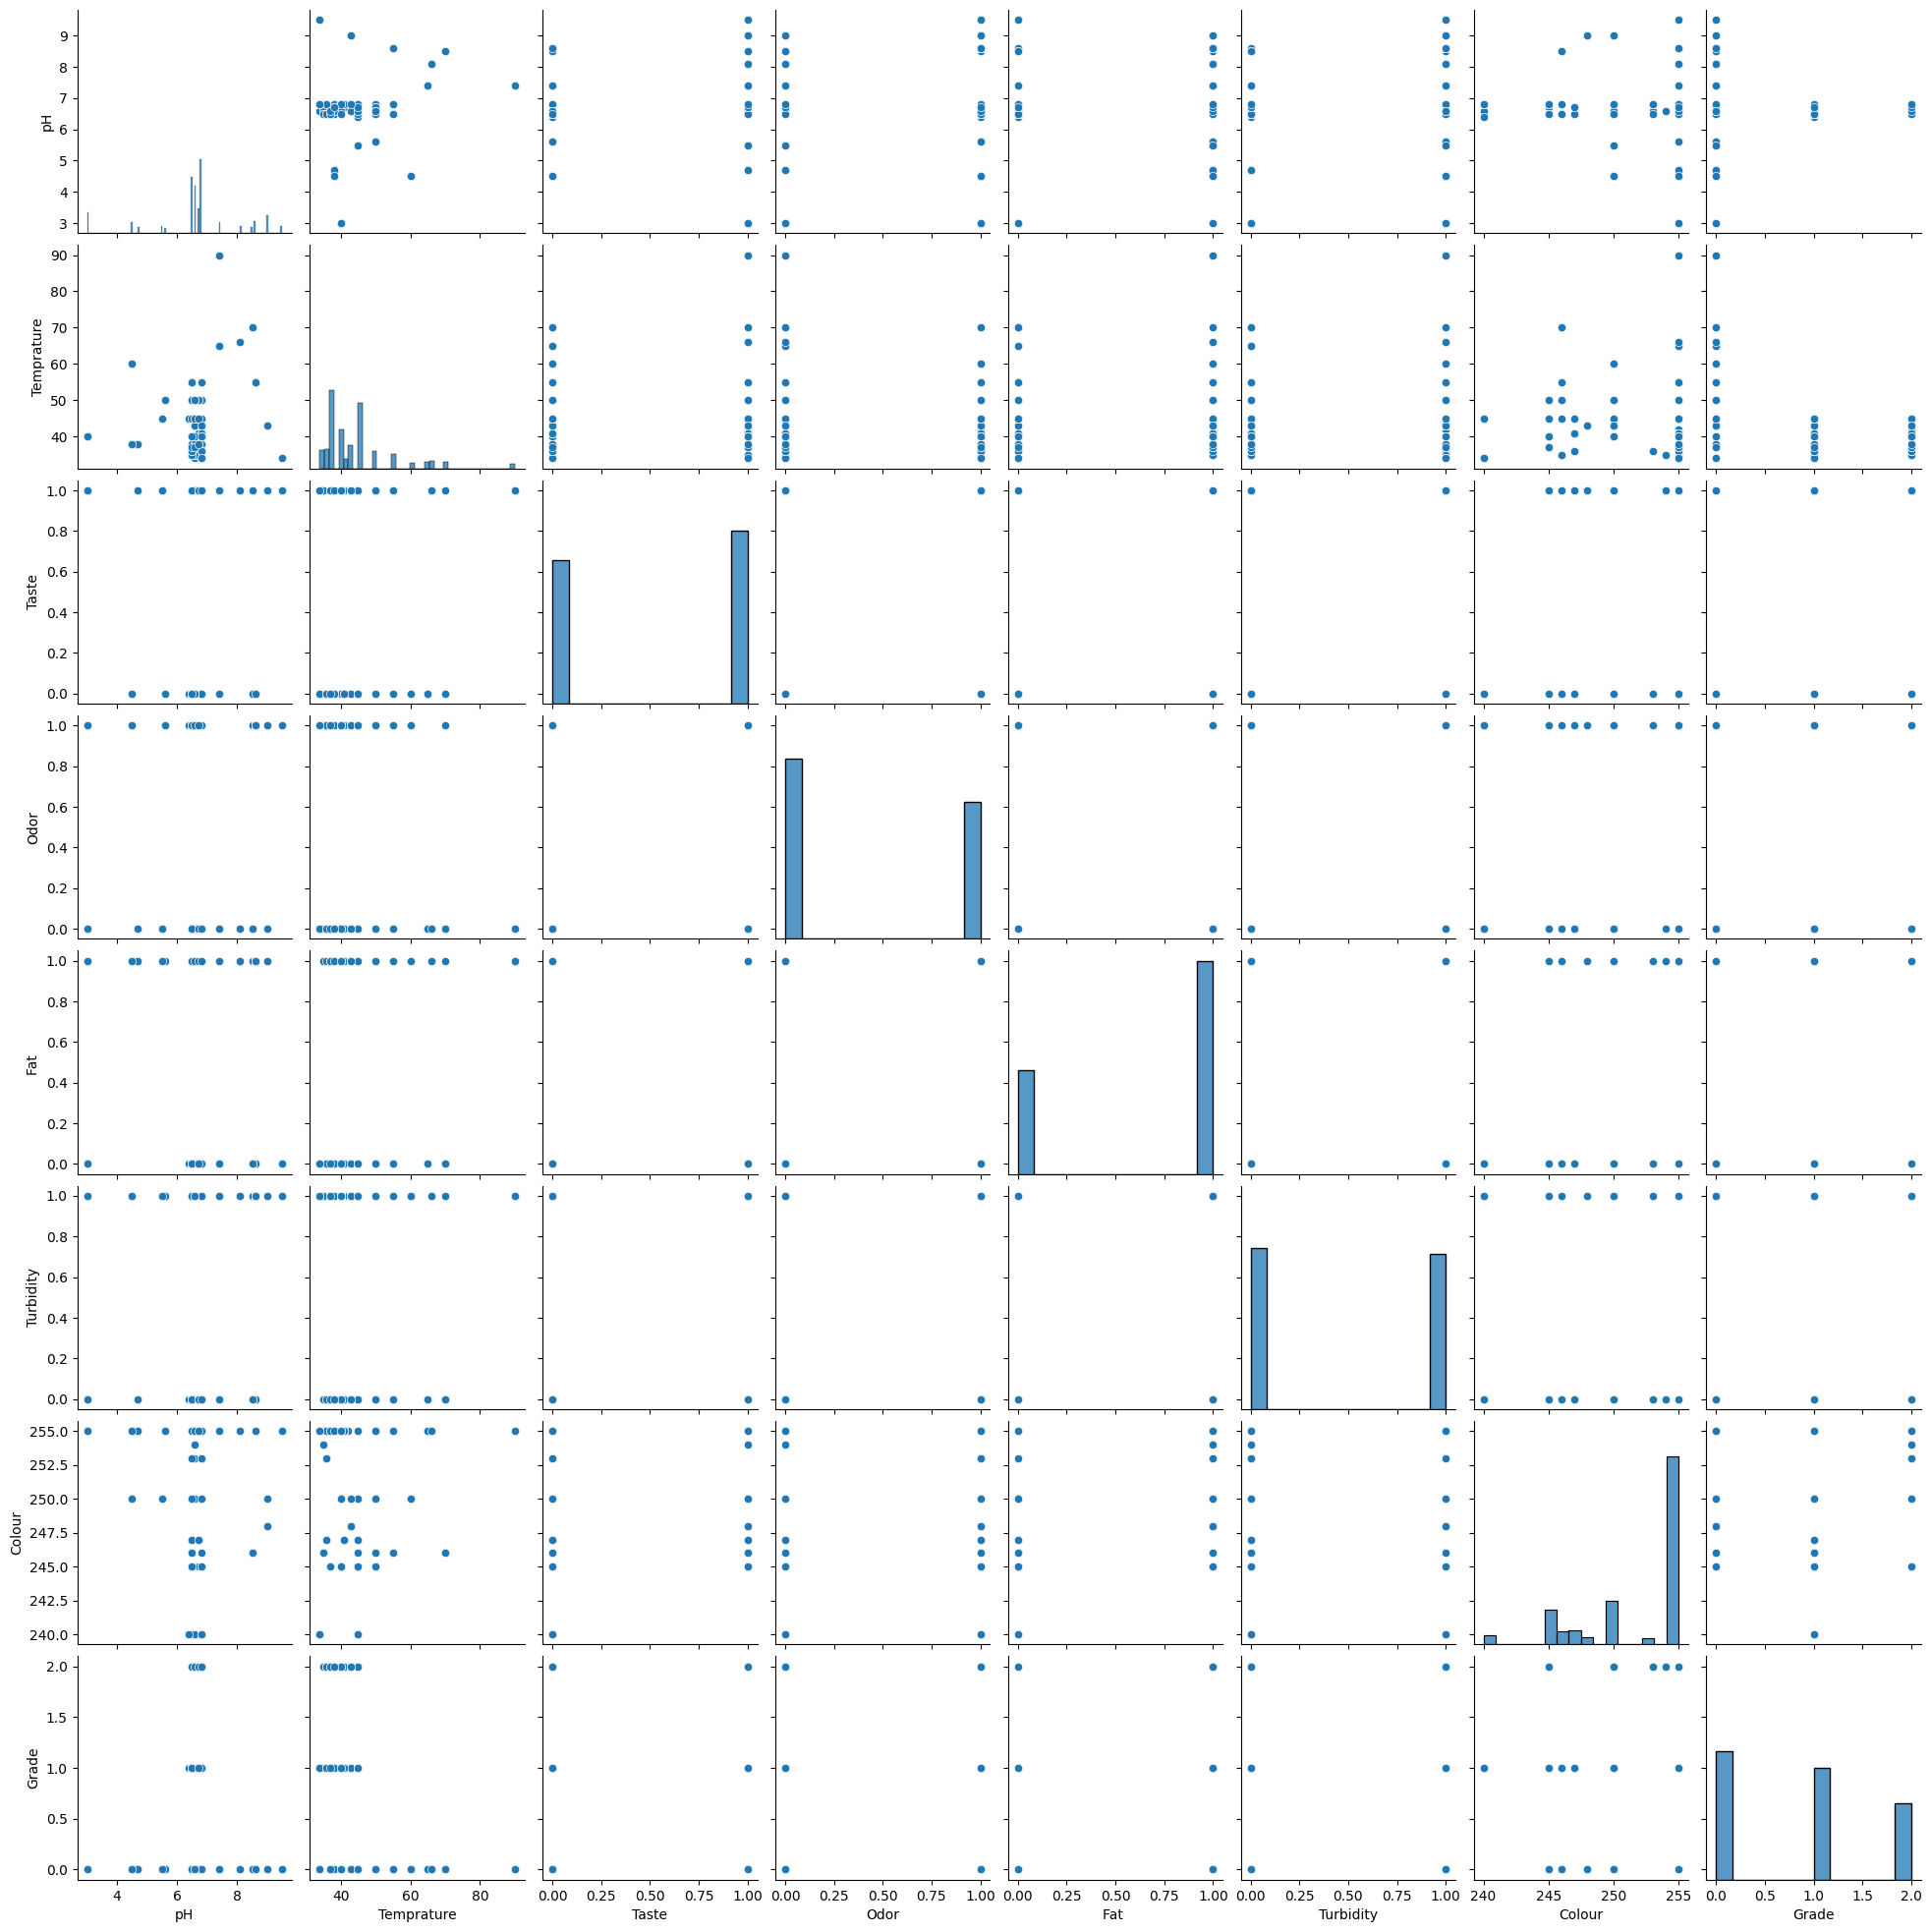

In [ ]:
sns.pairplot(data)

<Axes: xlabel='Taste', ylabel='Temprature'>

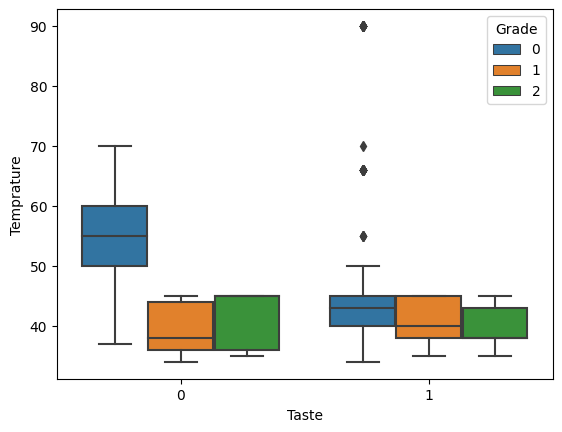

In [ ]:
sns.boxplot(data['Taste'],data['Temprature'],hue=data['Grade'])

<Axes: xlabel='Taste', ylabel='Colour'>

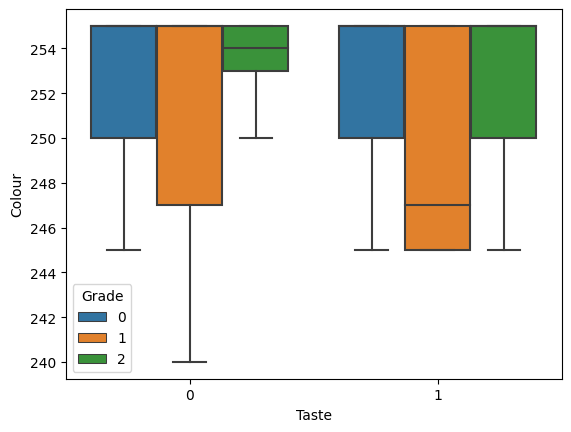

In [ ]:
sns.boxplot(data['Taste'],data['Colour'],hue=data['Grade'])

<Axes: xlabel='Odor', ylabel='Colour'>

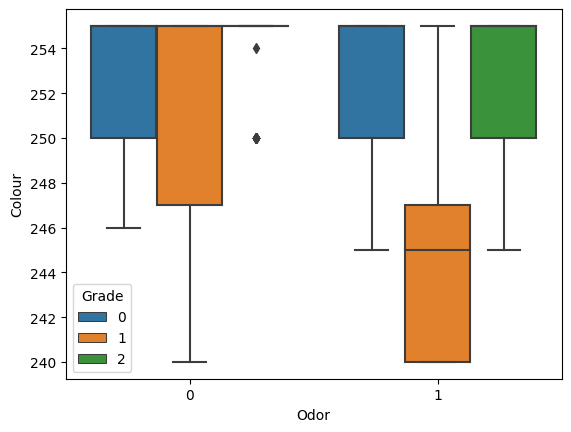

In [ ]:
sns.boxplot(data['Odor'],data['Colour'],hue=data['Grade'])

<Axes: xlabel='Turbidity', ylabel='Colour'>

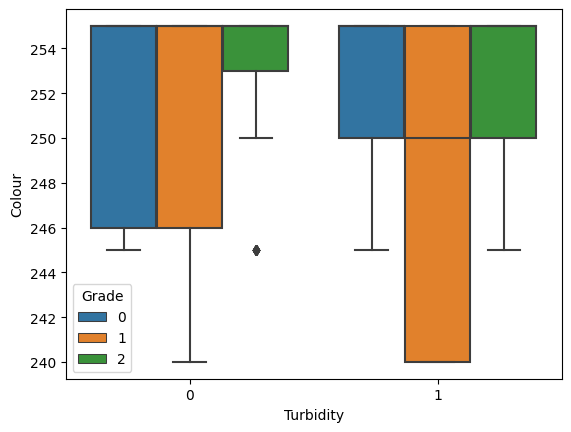

In [ ]:
sns.boxplot(data['Turbidity'],data['Colour'],hue=data['Grade'])

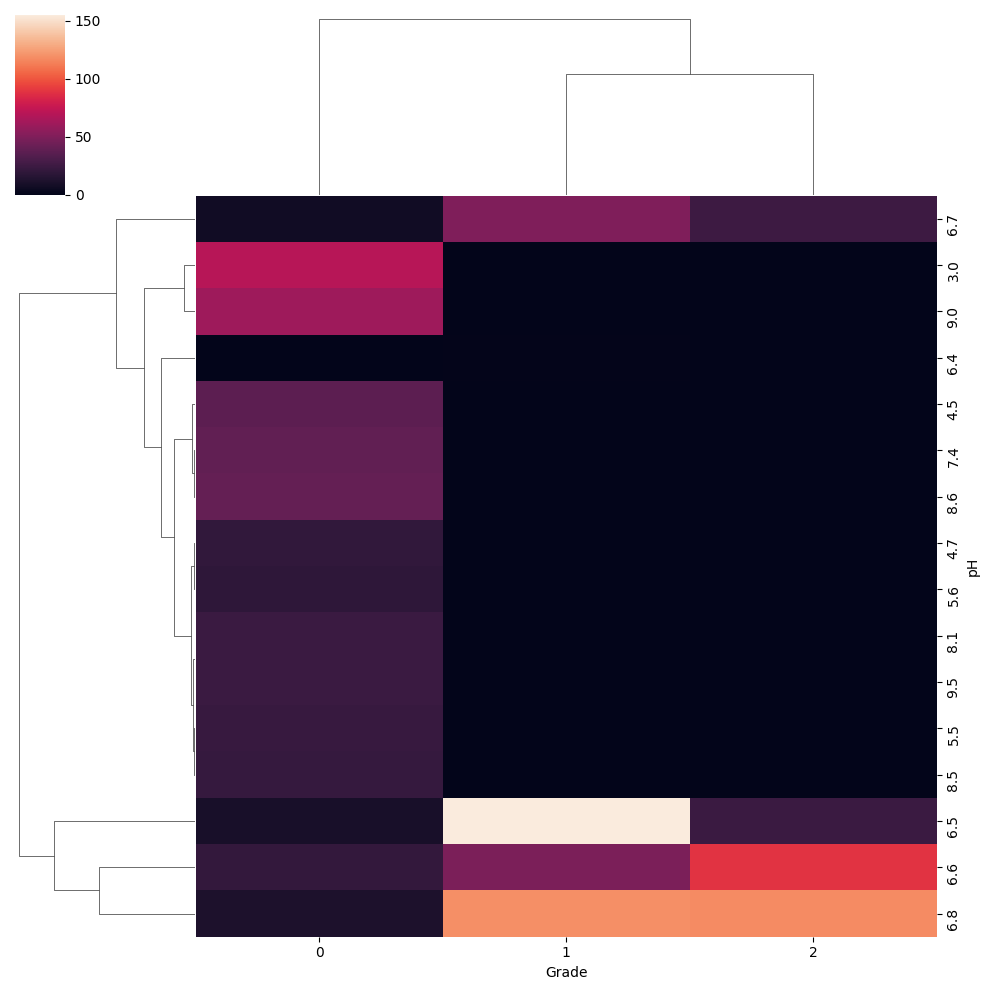

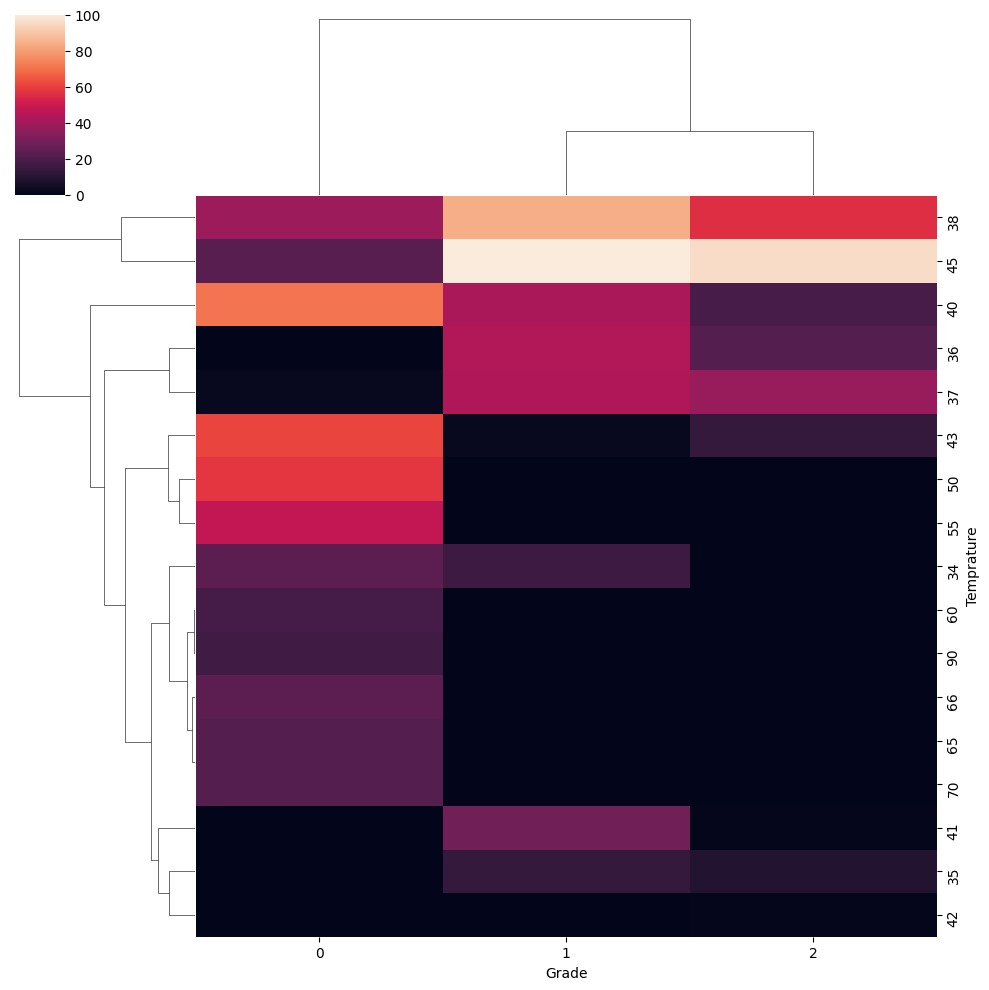

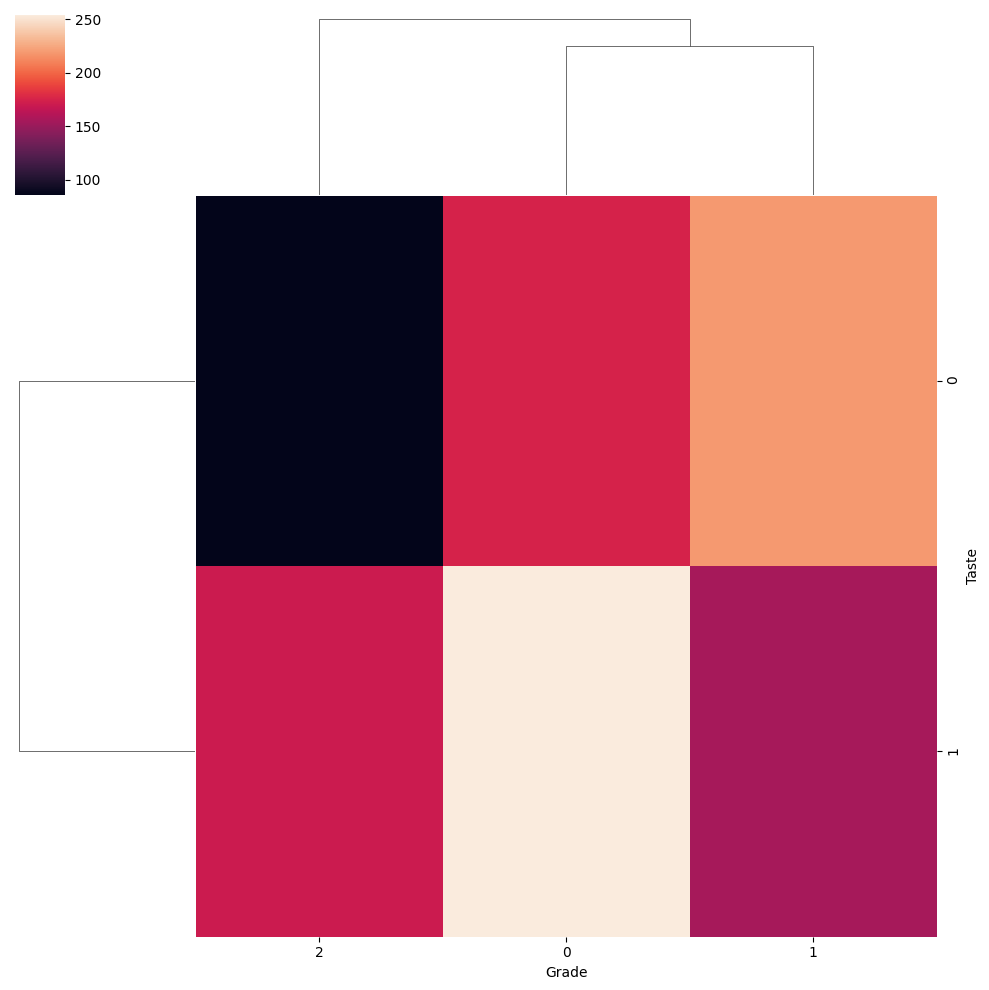

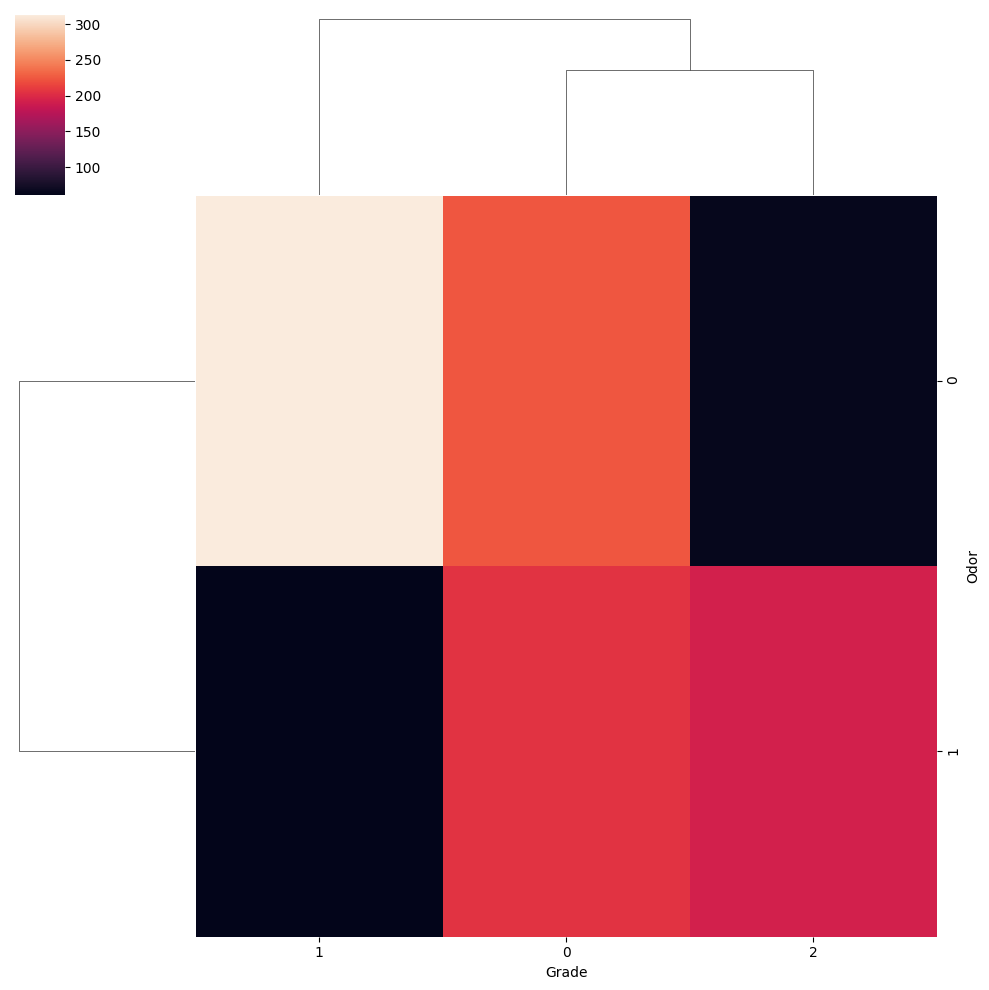

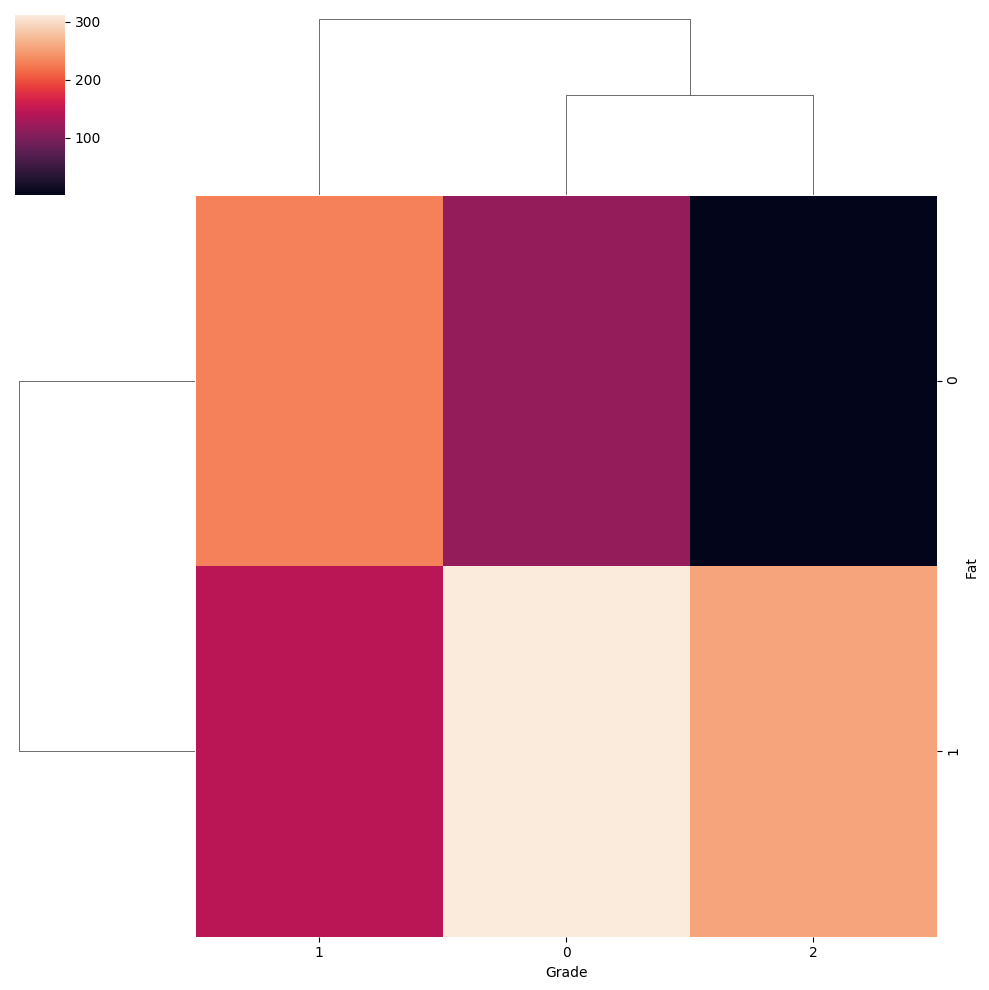

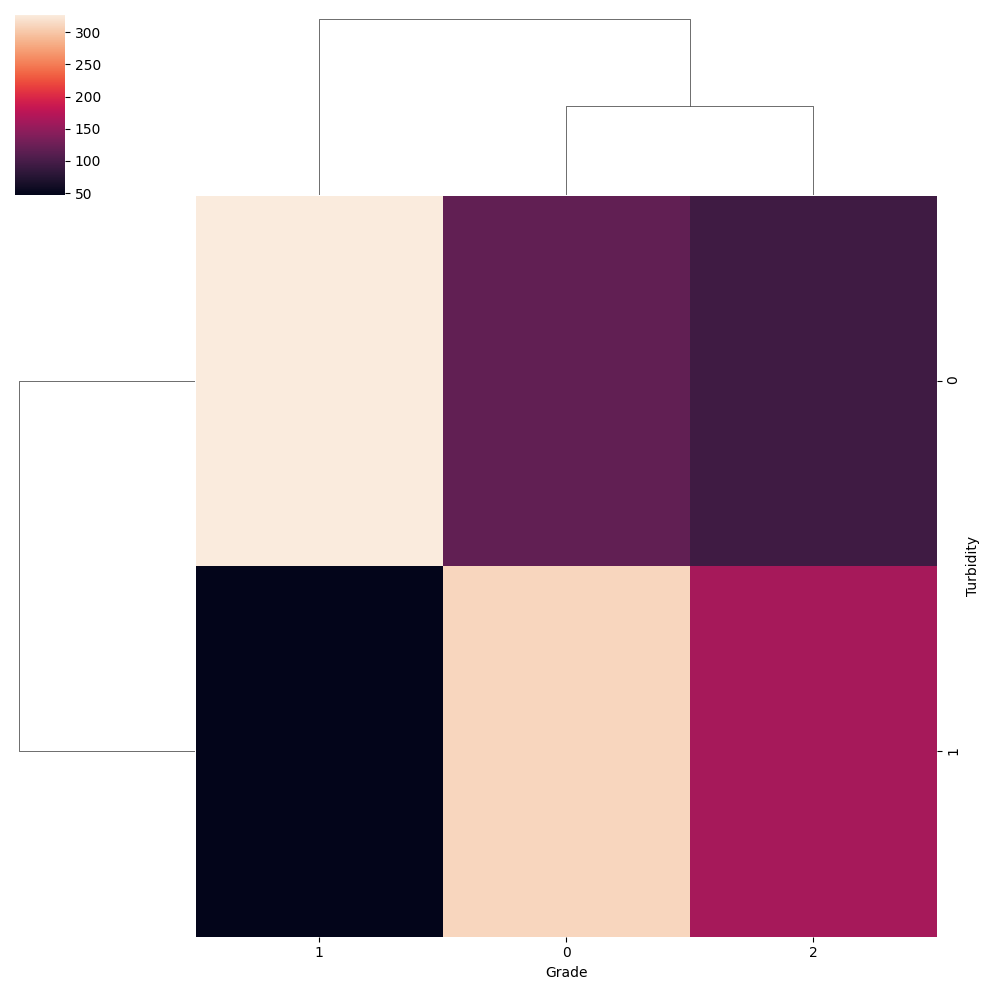

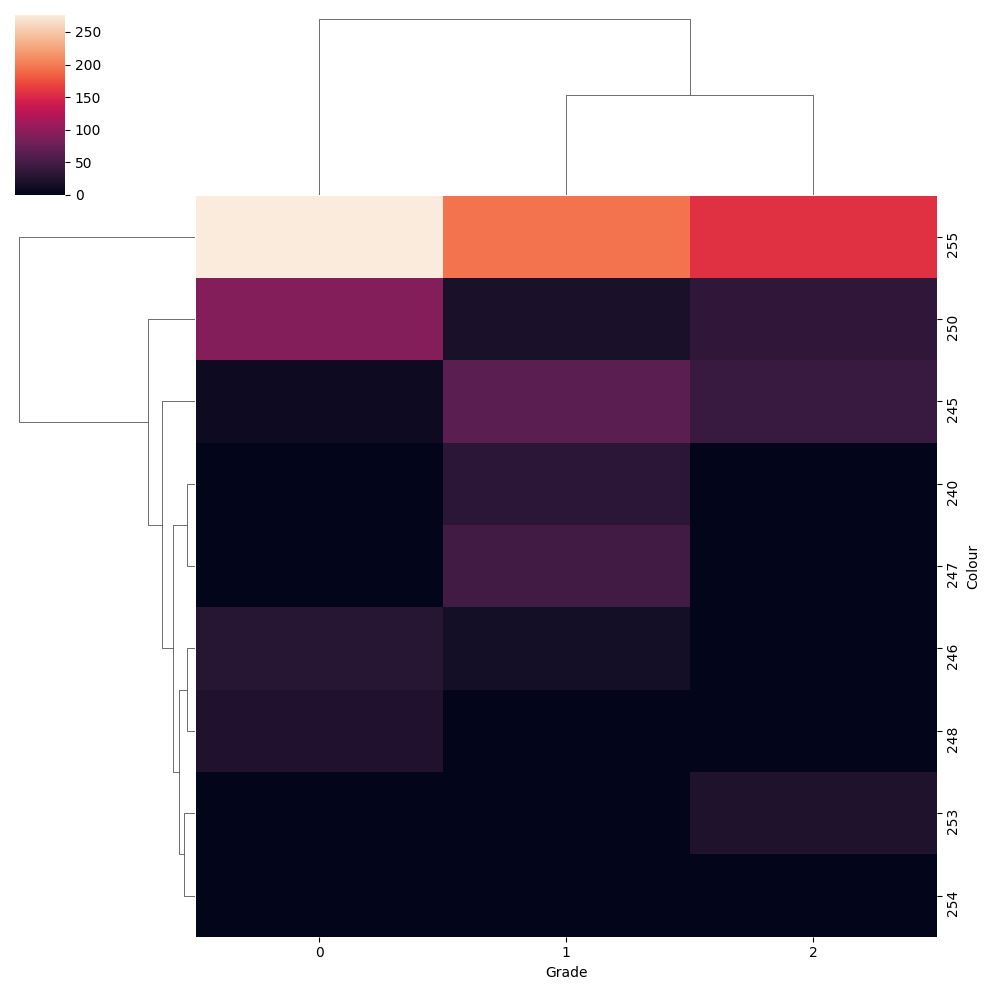

In [ ]:
for coluna in data:
    if coluna != "Grade":
        sns.clustermap(pd.crosstab(data[coluna],data['Grade']))

## Modelagem
### Importando os pacotes necessários

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Dividindo as colunas para teste e treino

In [ ]:
# Slicing dos dados para x
# Todas as linhas e colunas até a sétima coluna 
# (tudo menos a coluna de Grade)

x=data.iloc[:,:7]
x.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [ ]:
# Slicing de y
# Somente a sétima coluna (Grade)
y = data.iloc[:,7]
y.head()

0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int32

In [ ]:
type(data)

pandas.core.frame.DataFrame

#### Definição de 80% do dataframe para treino e 20% para teste

## Regressão Linear

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
193,6.7,38,1,0,1,0,255
761,6.7,45,1,1,0,0,247
75,6.8,45,1,1,1,1,245
327,6.5,38,1,0,0,0,255
693,6.5,35,1,0,1,0,246


In [ ]:
LinReg=LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predicts=LinReg.predict(x_test)
y_predicts

array([ 1.07075085,  0.98566914,  1.01921489,  0.92243975,  1.06202267,
        1.08955182,  1.16438859,  0.99920316,  0.79706059, -0.03294732,
       -0.03294732,  0.36132311,  0.90356826, -0.91951488,  0.96909942,
        0.75995062,  0.73296338,  0.98510944,  1.00585864,  1.35751119,
       -0.03294732,  0.90356826,  1.15495285,  0.79706059,  0.78391442,
        0.86878734,  0.78391442,  1.07812442,  0.0559722 ,  1.17382434,
        1.04592785,  1.01921489, -0.03294732,  0.30152034,  1.00585864,
       -0.91951488,  1.16049805,  0.36132311,  0.63754724,  0.99139485,
        1.04592785,  1.27796605,  0.92832073,  0.75995062,  1.25619951,
        0.9071833 ,  0.98566914,  1.04592785,  0.64728684,  0.96909942,
        0.96909942,  0.98510944,  0.98566914,  0.99920316,  0.98566914,
        1.28518039,  0.92832073,  0.78391442,  0.87374472,  0.80848836,
        0.90579995,  1.07075085,  0.99920316,  0.90356826,  0.87374472,
        1.07812442,  1.17382434,  0.99139485,  0.87374472,  1.08

In [ ]:
# R^2 do treino

LinReg.score(x_train, y_train)

0.27604257854373404

In [ ]:
# R^2 do teste 

LinReg.score(x_test, y_test)

0.27133592010503405

## Regressão Logística

In [ ]:
LR=LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_predicts=LR.predict(x_test)
y_predicts

array([1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0,
       0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1])

In [ ]:
# Confusion Matrix

print(confusion_matrix(y_test, y_predicts))

[[70 14  8]
 [ 5 66  4]
 [ 9 11 25]]


In [ ]:
LR.score(x_train, y_train)

0.7426210153482881

In [ ]:
LR.score(x_test, y_test)

0.7594339622641509

In [ ]:
LR_Predict = LR.predict(x_train)
LR_Accuracy = accuracy_score(y_train, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

Accuracy: 0.7426210153482881


In [ ]:
resultLR = classification_report(y_test, y_predicts)
print(resultLR)


              precision    recall  f1-score   support

           0       0.83      0.76      0.80        92
           1       0.73      0.88      0.80        75
           2       0.68      0.56      0.61        45

    accuracy                           0.76       212
   macro avg       0.74      0.73      0.73       212
weighted avg       0.76      0.76      0.76       212



### Random Forest

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
702,6.5,38,1,1,1,1,255
783,8.1,66,1,0,1,1,255
612,6.8,41,0,0,0,0,255
1036,6.8,40,1,1,1,1,255
760,8.1,66,1,0,1,1,255


In [ ]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_predicts =RFC.predict(x_test)
y_predicts

array([0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1,
       0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2,
       1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1,
       0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2,
       0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 2])

In [ ]:
print(confusion_matrix(y_test, y_predicts))

[[88  0  0]
 [ 0 71  0]
 [ 0  0 53]]


In [ ]:
RFC.score(x_train,y_train)

1.0

In [ ]:
RFC.score(x_test,y_test)

1.0

In [ ]:
resultRFC = classification_report(y_test, y_predicts)
print(resultRFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        53

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [ ]:
RFC_Predict = RFC.predict(x_train)
RFC_Accuracy = accuracy_score(y_train, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 1.0


### K-Nearest Neighbors 

In [ ]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
435,6.5,38,1,0,0,0,255
532,7.4,65,0,0,0,0,255
602,5.6,50,0,1,1,1,255
620,6.6,38,0,0,0,0,255
1057,6.8,43,1,0,1,0,250


In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predicts=KNN.predict(x_test)
y_predicts

array([1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2,
       2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 0,
       2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
print(confusion_matrix(y_test, y_predicts))

[[90  0  0]
 [ 0 70  1]
 [ 0  0 51]]


In [ ]:
KNN.score(x_train,y_train)

0.9929161747343566

In [ ]:
KNN.score(x_test,y_test)

0.9952830188679245

In [ ]:
resultKNN = classification_report(y_test, y_predicts)
print(resultKNN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      0.99      0.99        71
           2       0.98      1.00      0.99        51

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



In [ ]:
KNN_Predict = KNN.predict(x_train)
KNN_Accuracy = accuracy_score(y_train, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.9929161747343566


### Árvore de Decisão

In [ ]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
689,6.6,45,0,1,1,1,250
573,6.8,41,0,0,1,0,255
620,6.6,38,0,0,0,0,255
276,6.6,50,0,0,0,0,255
1001,6.8,45,0,1,1,1,255


In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predicts =DT.predict(x_test)
y_predicts

array([2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1,
       2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2,
       1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1])

In [ ]:
print(confusion_matrix(y_test, y_predicts))

[[95  0  1]
 [ 0 66  0]
 [ 0  1 49]]


In [ ]:
print(confusion_matrix(y_test, y_predicts))

[[95  0  1]
 [ 0 66  0]
 [ 0  1 49]]


In [ ]:
DT.score(x_train,y_train)

1.0

In [ ]:
DT.score(x_test,y_test)

0.9905660377358491

In [ ]:
resultDT = classification_report(y_test, y_predicts)
print(resultDT)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       0.99      1.00      0.99        66
           2       0.98      0.98      0.98        50

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [ ]:
DT_Predict = DT.predict(x_train)
DT_Accuracy = accuracy_score(y_train, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 1.0


## Sumário do Desempenho dos Modelos

In [ ]:
model_performance_accuracy = pd.DataFrame(
                {'Model': ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier'],
                 'Accuracy': [LR_Accuracy, KNN_Accuracy, DT_Accuracy, RFC_Accuracy]
                }
            )

In [ ]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
2,DecisionTreeClassifier,1.000000
3,RandomForestClassifier,1.000000
1,KNeighborsClassifier,0.992916
0,LogisticRegression,0.742621


In [ ]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


#### Agora é possível saber a qualidade do leite, inserindo os valores de modo respectivo

In [ ]:
output=DT.predict([[6.6,1,1,1,1,1,240]])

In [ ]:
if output == 2:
 print("A qualidade do leite é 'Boa'")
if output == 1:
 print("A qualidade do leite é 'Moderada'")
if output == 0:
 print("A qualidade do leite é 'Ruim'")

A qualidade do leite é 'Ruim'
